# 文本分析与可视化

## 在进行文本建模之前，一般都要先进行文本数据的分析

In [3]:
#coding:utf-8
__author__ = 'Xiachuankun'

import warnings
warnings.filterwarnings("ignore")
import jieba    #分词包
import numpy    
import codecs   #codecs提供的open方法来指定打开的文件的语言编码，它会在读取的时候自动转换为内部unicode 
import pandas as pd  
import matplotlib.pyplot as plt #matplotlib作为常用的可视化工具
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
from wordcloud import WordCloud #词云包

In [4]:
#读取文本数据并分词，将长度大于1的词保留下来作为词云
df = pd.read_csv("./origin_data/entertainment_news.csv", encoding='utf-8')
df = df.dropna()     #d丢弃含有缺失值的行
content=df["content"].values.tolist() # 使用pandas读入文件，并转为list保存
segment=[]
for line in content:
    try: # 对每条数据进行分词
        segs=jieba.lcut(line)
        for seg in segs:
            if len(seg)>1 and seg!='\r\n': # 除去长度为1的词、换行符
                segment.append(seg)
    except:
        print(line)
        continue

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.898 seconds.
Prefix dict has been built successfully.


In [5]:
print(df.head(5))
print(segment[:5])

   Unnamed: 0                                            content
0           0  　　2016年是综艺井喷的一年，《2016年中国网络视听发展研究报告》数据显示，截至2016...
1           1                                               　　区别
2           2                                 　　平台决定了资源的多寡和资本的投入
3           3  　　网络综艺和电视综艺最大的区别在哪？其实是平台。因为平台决定了资源的多寡和资本的投入。所以...
4           4  　　网络综艺与电视综艺在播出模式、观众群体以及节目板块等方面也都存在差异。在传播上，电视台比...
['2016', '综艺', '井喷', '一年', '2016']


## 去停用词

In [6]:
#将在停用词表中也出现的词删除掉
words_df=pd.DataFrame({'segment':segment})
#words_df.head()
stopwords=pd.read_csv("origin_data/stopwords.txt",index_col=False,quoting=3,sep="\t",names=['stopword'], encoding='utf-8')#quoting=3全不引用
#stopwords.head()
words_df=words_df[~words_df.segment.isin(stopwords.stopword)] # 把包含在停用词表里的词语去掉 
print(words_df.count())

segment    1103555
dtype: int64


## 统计词频

In [7]:
words_stat=words_df.groupby(by=['segment'])['segment'].agg({"计数":numpy.size}) # 统计词频数，并添加计数列
words_stat=words_stat.reset_index().sort_values(by=["计数"],ascending=False) # 对词频进行排序
words_stat.head(10)

,segment,计数
60814,电影,10230
73268,观众,5574
8618,中国,5476
70484,节目,4398
33626,导演,4197
56796,演员,3250
83900,音乐,3170
38468,影片,3030
45543,故事,2643
63686,票房,2623


## 做词云

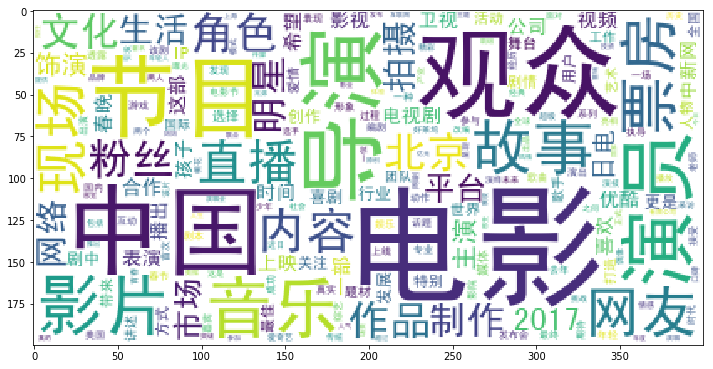

In [8]:
matplotlib.rcParams['figure.figsize'] = (12.0, 12.0) # 设定图像尺寸
wordcloud=WordCloud(font_path="origin_data/simhei.ttf",background_color="white",max_font_size=80) # 设定词云的字体路径
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values} # 取前1000个词频最高的词语
wordcloud=wordcloud.fit_words(word_frequence) 
plt.imshow(wordcloud)

## 自定义背景图做词云

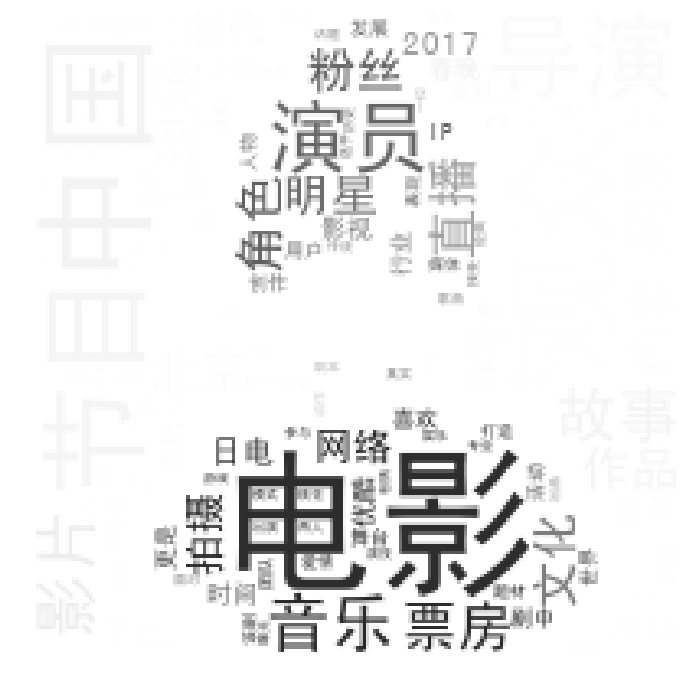

In [10]:
from imageio import imread
matplotlib.rcParams['figure.figsize'] = (12.0, 12.0)
from wordcloud import WordCloud,ImageColorGenerator
bimg=imread('img/kk.jpg')
wordcloud=WordCloud(background_color="white",mask=bimg,font_path='origin_data/simhei.ttf',max_font_size=200) # 设定自定义背景图片
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
wordcloud=wordcloud.fit_words(word_frequence)
bimgColors=ImageColorGenerator(bimg)
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=bimgColors))